In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

def get_files_set(data_dir):
    # reading filenames from the path
    files=[]
    for f in os.listdir(data_dir):
        if f.endswith(".png") or f.endswith(".jpg") or f.endswith(".jpeg"):
            files.append(data_dir + "/" + f)
    return files

def eval_image(y_true, y_pred, thresh, average):
    # threshold to make black & white
    #(thresh, y_pred) = cv2.threshold(y_pred, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # 100, 255
    y_true = cv2.threshold(y_true, thresh, 255, cv2.THRESH_BINARY)[1]
    y_pred = cv2.threshold(y_pred, thresh, 255, cv2.THRESH_BINARY)[1]

    # convert images to 0 and 1 1d arrays
    y_true = np.ravel((y_true / 255).astype(int))
    y_pred = np.ravel((y_pred / 255).astype(int))

    return f1_score(y_true, y_pred, average=average)

def eval_dataset(true_dir, pred_dir, thresh, show=True):
    true_files = get_files_set(true_dir)
    pred_files = get_files_set(pred_dir)

    f1_scores_b = []
    f1_scores_m = []
    files = []

    df = pd.DataFrame()
    for t,p in zip(true_files, pred_files):
        y_true = cv2.imread(t, 0)
        y_pred = cv2.imread(p, 0)

        if y_pred.shape[0] != y_true.shape[0] or y_pred.shape[1] != y_true.shape[1]:
            y_pred = cv2.resize(y_pred, y_true.shape)
        
        f1b = eval_image(y_true, y_pred, thresh, 'binary')
        f1_scores_b.append(f1b)

        #f1m = eval_image(y_true, y_pred, thresh, 'macro')
        #f1_scores_m.append(f1m)

        f = t.split('/')[-1]
        files.append(f)

    df['file'] = files
    df['f1_binary'] = f1_scores_b
    #df['f1_macro'] = f1_scores_m

    if show:
        display(df.round(4))
        display(df.describe().round(4).loc[['mean','std']])

    return df

def merge_eval_results(eval_results, run_names):
    evals = pd.concat(eval_results, axis=1).drop(columns=['file'])
    evals.columns = run_names
    merged = pd.concat([eval_results[0][['file']], evals], axis=1)
    
    return merged

def eval_runs(true_dir, run_outputs_list, thresh):
    eval_results = []
    runs_names = []
    for run_out in run_outputs_list:
        run_name = run_out.split('/')[-3]
        print(run_name)
        runs_names.append(run_name)
        edf = eval_dataset(true_dir, run_out, thresh=thresh, show=False)
        eval_results.append(edf)
    
    merged = merge_eval_results(eval_results, runs_names)

    return merged

def plot_eval_results(merged_eval_results):
    cams = [cam.split('-')[0][-2:] for cam in merged_eval_results.file.values]
    ax = merged_eval_results.plot(figsize=(10,5))
    ax.set_xticks(merged_eval_results.index)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.grid(linestyle='-', linewidth='0.5', color='grey')
    ax.set_xticklabels(cams)

In [4]:
eval_runs("../../data/PoC/f1_score_test_set/ground_truth/",
          ["../../data/PoC/f1_score_test_set/hed_mask/"], thresh=100)

f1_score_test_set


file  f1_score_test_set
0  20200713-2026300.png           0.015400
1  20200713-2027152.png           0.016212
2  20200713-2028412.png           0.017509
3  20200713-2029265.png           0.017423
4  20200713-2031269.png           0.016814

In [59]:
labels = "../../data/valid_v2/labels"
runids = ["../../models/Run15_10268i_150e_08b_v2/results/fuse_stitched",
          "../../models/Run37_10268i_075e_16b_v2/results/fuse_stitched",
          "../../models/Run35_29693i_150e_08b_v2_aug/results/fuse_stitched",
          "../../models/Run41_29693i_050e_24b_v2_aug/results/fuse_stitched"]

In [60]:
eval_results_10 = eval_runs(true_dir=labels, run_outputs_list=runids, thresh=10)

Run15_10268i_150e_08b_v2
Run37_10268i_075e_16b_v2
Run35_29693i_150e_08b_v2_aug
Run41_29693i_050e_24b_v2_aug


In [139]:
eval_results_100 = eval_runs(true_dir=labels, run_outputs_list=runids, thresh=100)

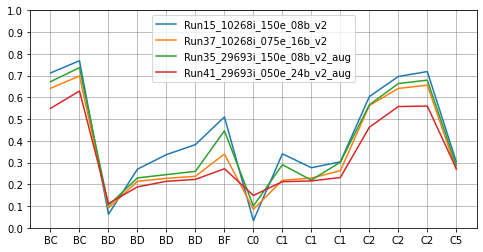

In [61]:
plot_eval_results(eval_results_10)

In [150]:
labels = "../../data/valid_v2/labels_masked"
runids = ["../../models/edge_detection/Run15_10268i_150e_08b_v2/fuse_stitched_masked",
          "../../models/edge_detection/Run37_10268i_075e_16b_v2/fuse_stitched_masked",
          "../../models/edge_detection/Run35_29693i_150e_08b_v2_aug/fuse_stitched_masked",
          "../../models/edge_detection/Run41_29693i_050e_24b_v2_aug/fuse_stitched_masked"]

In [151]:
eval_results_10_masked = eval_runs(true_dir=labels, run_outputs_list=runids, thresh=10)

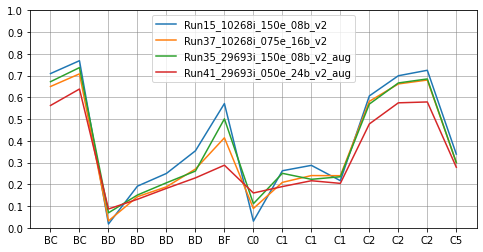

In [152]:
plot_eval_results(eval_results_10_masked)

In [20]:
labels = "../../data/valid_v2/labels"
runids = ["../../models/10268i_075e_24b_clahe_c2_b050_fd184/results/fuse_stitched",
          "../../models/10268i_075e_24b_clahe_c2_b100_e1769/results/fuse_stitched",
          "../../models/10268i_075e_24b_clahe_c5_b050_dca0d/results/fuse_stitched",
          "../../models/10268i_075e_24b_clahe_c5_b100_7d0d4/results/fuse_stitched",
          "../../models/10268i_150e_08b_clahe_c2_b050_52f90/results/fuse_stitched",
          "../../models/10268i_150e_08b_clahe_c2_b100_bdb53/results/fuse_stitched",
          "../../models/10268i_150e_08b_clahe_c5_b050_3f681/results/fuse_stitched",
          "../../models/10268i_150e_08b_clahe_c5_b100_07652/results/fuse_stitched"
]

In [34]:
eval_results_10_clahe = eval_runs(true_dir=labels, run_outputs_list=runids,thresh=10)

10268i_075e_24b_clahe_c2_b050_fd184
10268i_075e_24b_clahe_c2_b100_e1769
10268i_075e_24b_clahe_c5_b050_dca0d
10268i_075e_24b_clahe_c5_b100_7d0d4
10268i_150e_08b_clahe_c2_b050_52f90
10268i_150e_08b_clahe_c2_b100_bdb53
10268i_150e_08b_clahe_c5_b050_3f681
10268i_150e_08b_clahe_c5_b100_07652


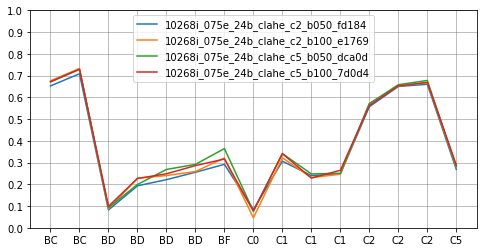

In [46]:
plot_eval_results(eval_results_10_clahe.iloc[:,:5])

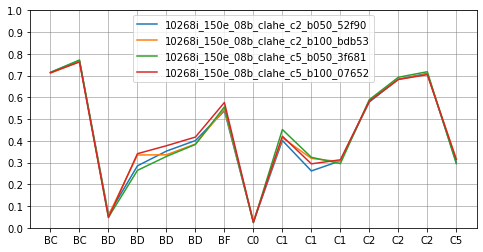

In [56]:
plot_eval_results(eval_results_10_clahe.iloc[:,[0,5,6,7,8]])

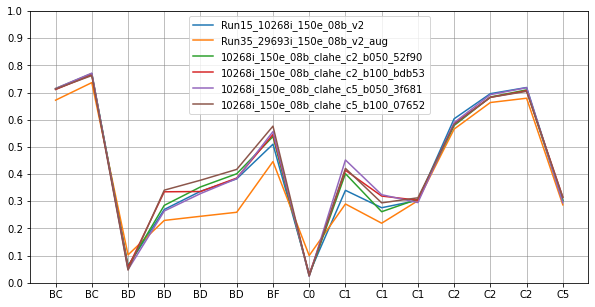

In [71]:
plot_eval_results(pd.concat((eval_results_10.iloc[:,[0,1,3]],eval_results_10_clahe.iloc[:,[5,6,7,8]]), axis=1))

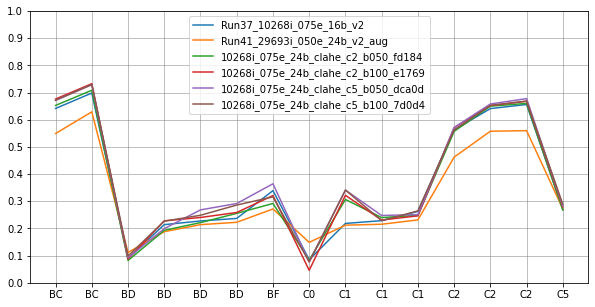

In [72]:
plot_eval_results(pd.concat((eval_results_10.iloc[:,[0,2,4]],eval_results_10_clahe.iloc[:,[1,2,3,4]]), axis=1))

In [74]:
labels = "../../data/valid_v2/labels"
runids = ["../../models/34015i_150e_08b_clahe_c5_b050_r1f4_d1862/results/fuse_stitched",
          "../../models/34015i_150e_24b_clahe_c5_b050_r1f4_17f1d/results/fuse_stitched",
          "../../models/34045i_150e_08b_clahe_c5_b100_r1f4_beebf/results/fuse_stitched",
          "../../models/34045i_150e_24b_clahe_c5_b100_r1f4_dc657/results/fuse_stitched"
]

In [75]:
eval_results_10_clahe_best = eval_runs(true_dir=labels, run_outputs_list=runids, thresh=10)

34015i_150e_08b_clahe_c5_b050_r1f4_d1862
34015i_150e_24b_clahe_c5_b050_r1f4_17f1d
34045i_150e_08b_clahe_c5_b100_r1f4_beebf
34045i_150e_24b_clahe_c5_b100_r1f4_dc657


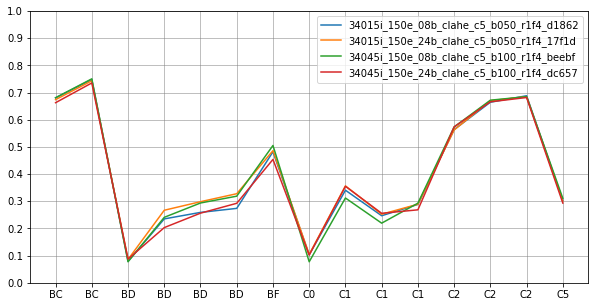

In [76]:
plot_eval_results(eval_results_10_clahe_best)

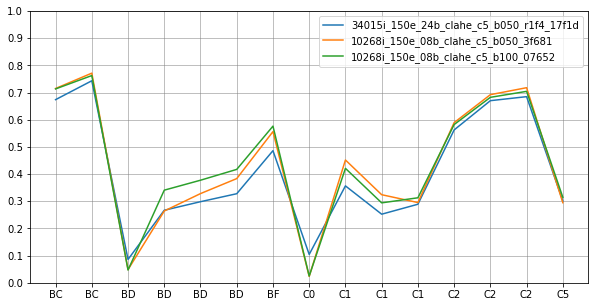

In [78]:
plot_eval_results(pd.concat((eval_results_10_clahe_best.iloc[:,[0,2]],eval_results_10_clahe.iloc[:,[7,8]]), axis=1))

### Comparison of local vs. inference module results

In [4]:
labels = "../../data/valid_v2/labels"
runids = ["../../models/10268i_150e_08b_clahe_c5_b050_3f681/results/fuse_stitched",
          "../../models/10268i_150e_08b_clahe_c5_b050_3f681/results/inference_module_valid"
]

In [5]:
eval_local_vs_inference = eval_runs(true_dir=labels, run_outputs_list=runids, thresh=10)

10268i_150e_08b_clahe_c5_b050_3f681
10268i_150e_08b_clahe_c5_b050_3f681


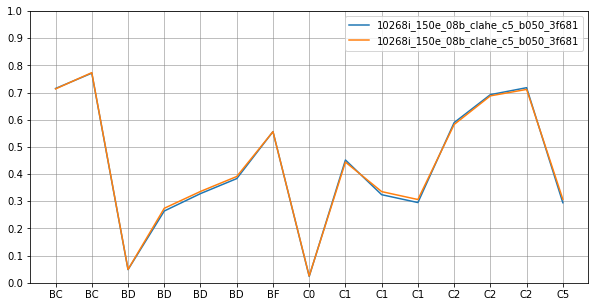

In [6]:
plot_eval_results(eval_local_vs_inference)